In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [2]:
targets.sum()

11401.600000000002

In [3]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
features.shape

(506, 13)

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
features["price"]=targets
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
features.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

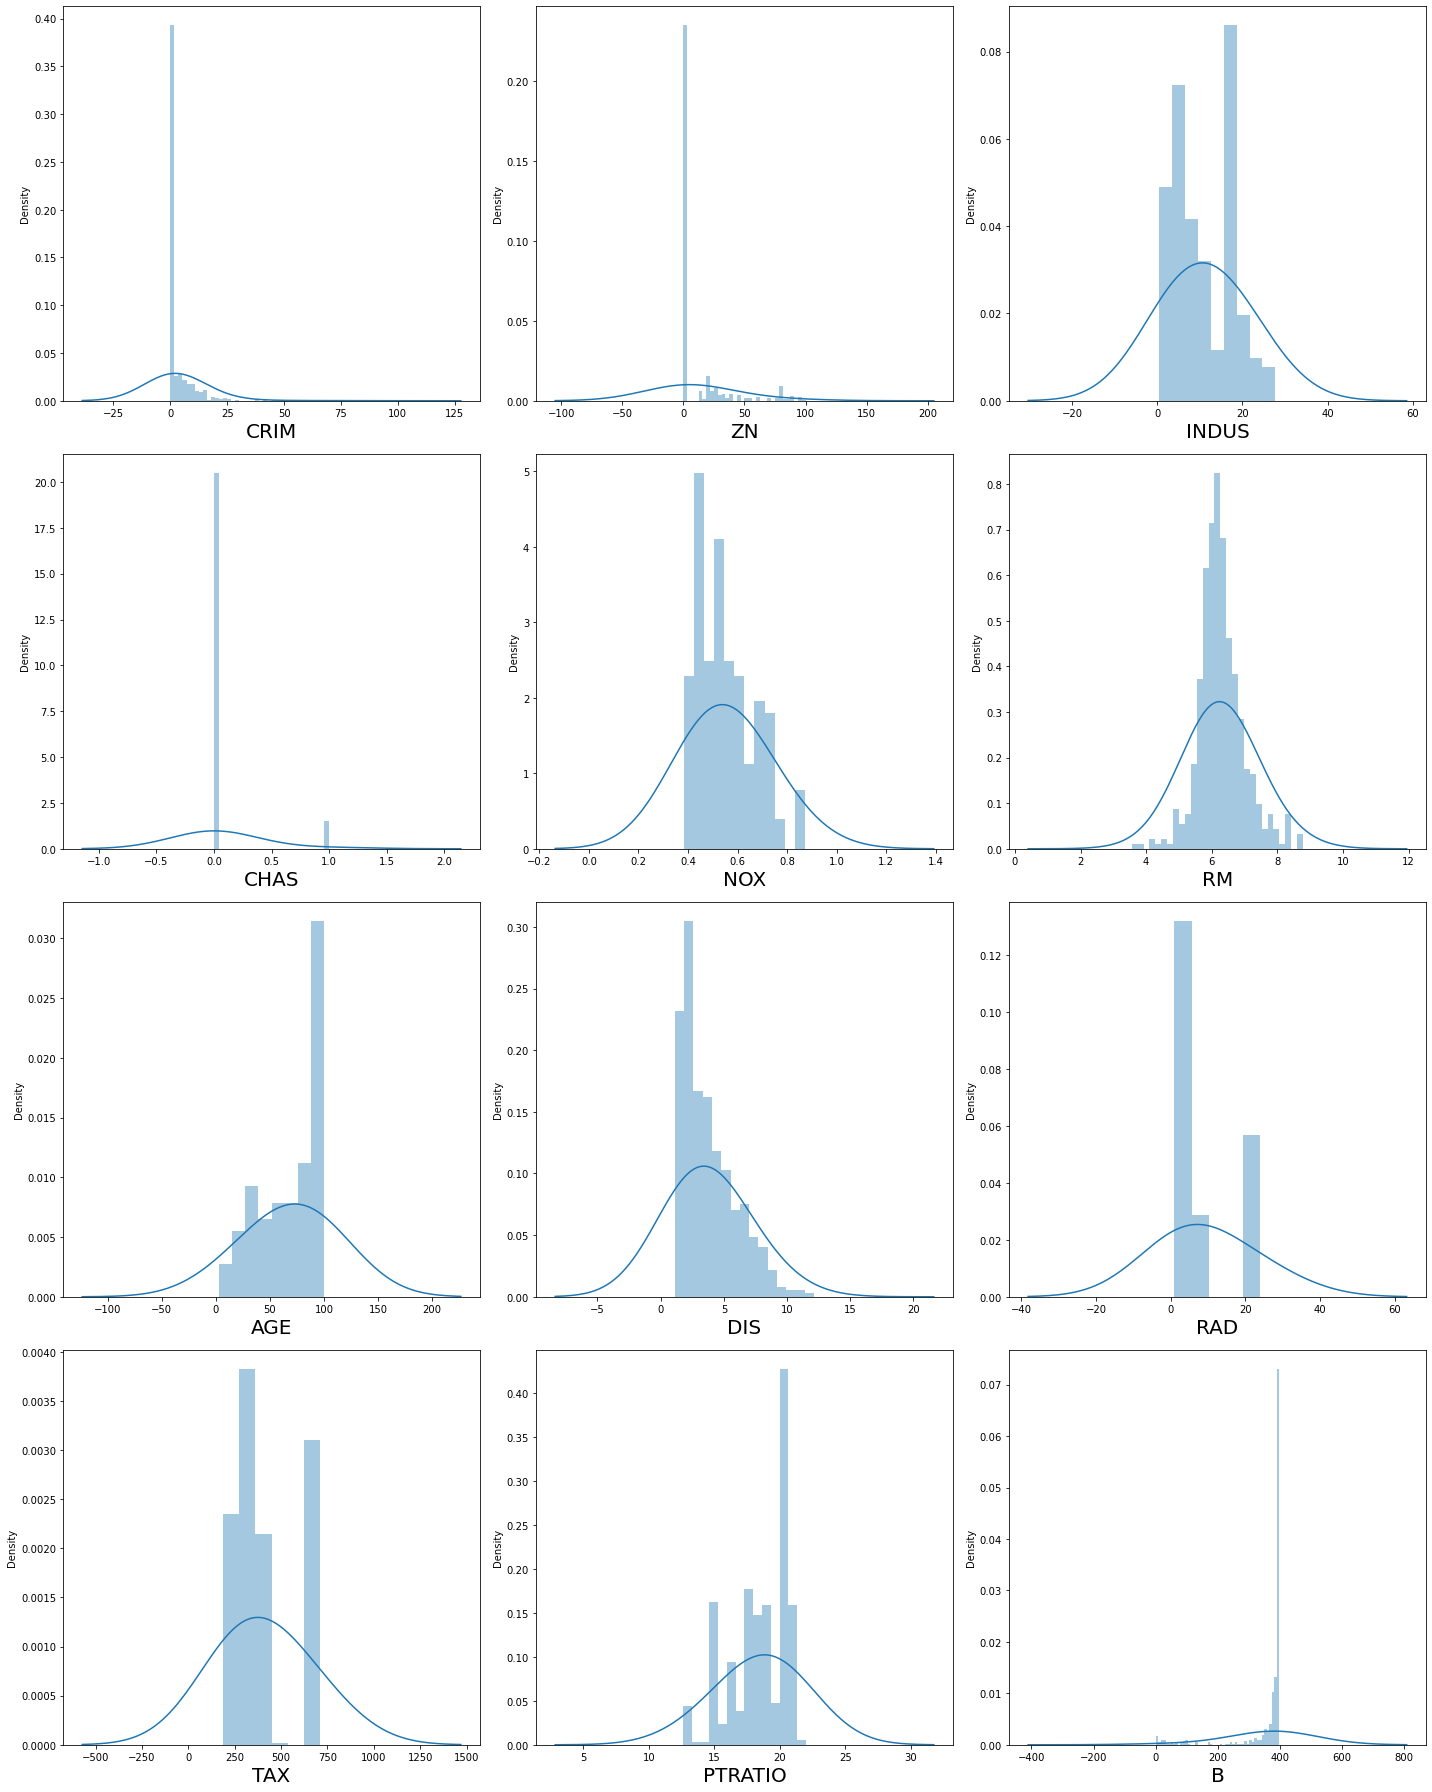

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in features:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(features[column], kde_kws = {'bw' : 1.5})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

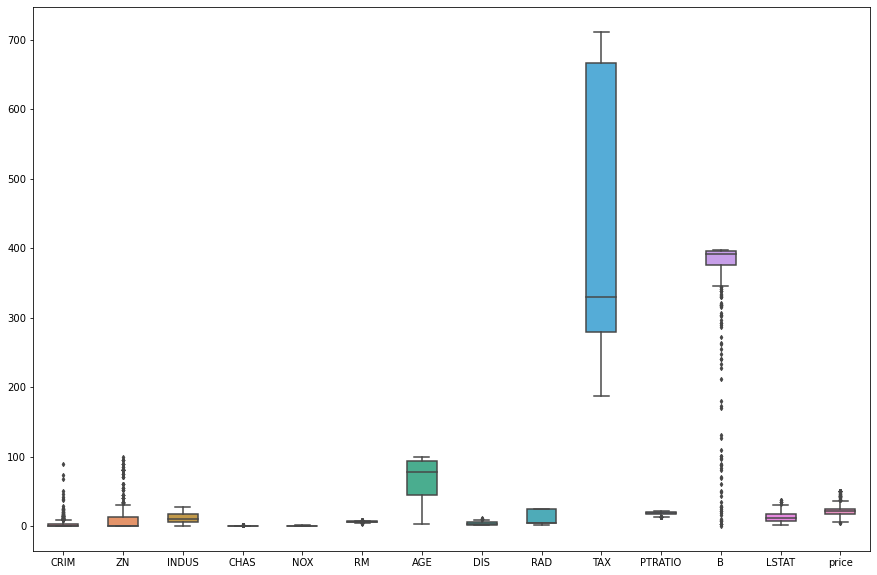

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=features, width= 0.5,ax=ax,  fliersize=3)

In [10]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [12]:
features.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


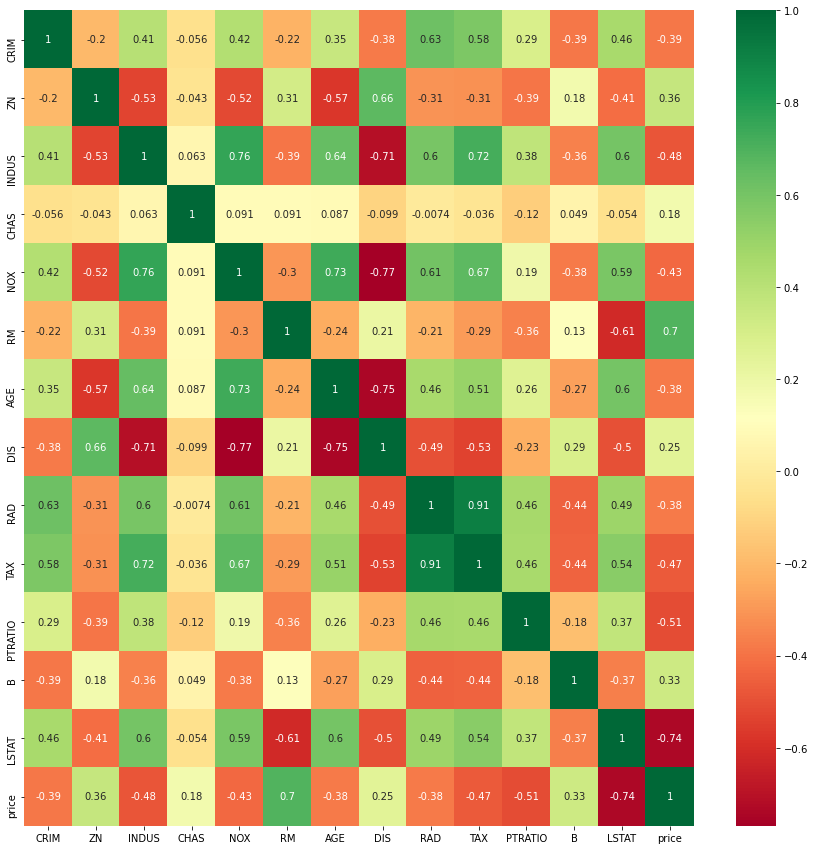

In [13]:
cormat=features.corr()
top_corr_features=cormat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:>

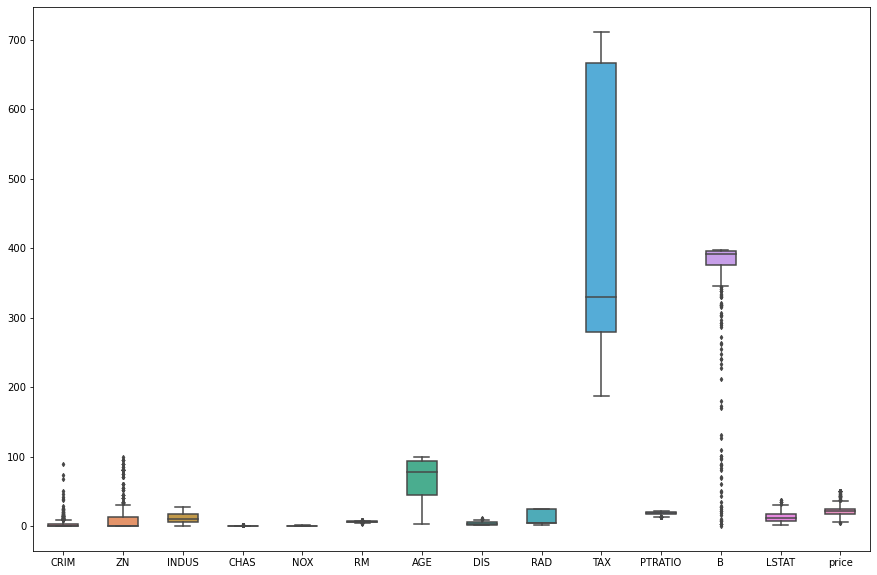

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=features, width= 0.5,ax=ax,  fliersize=3)

In [16]:
X=features.drop(columns = 'price')
y=features['price']

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [19]:
clf = DecisionTreeRegressor( min_samples_split= 2)
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [20]:
clf.score(x_test,y_test)

0.7353139719576107

In [21]:
clf2 = DecisionTreeRegressor(criterion = 'mse', max_depth =24, min_samples_leaf= 1)
clf2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=24)

In [22]:
clf2.score(x_test,y_test)

0.7056912524468861

In [23]:
rand_clf = RandomForestRegressor(random_state=6)

In [24]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(random_state=6)

In [25]:
rand_clf.score(x_test,y_test)

0.8843800512856986

In [26]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [27]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [28]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [29]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [41]:
rand_clf = RandomForestRegressor(criterion= 'mae',max_depth= 15,max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2,n_estimators= 130, random_state=6)

In [42]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=15, max_features='log2',
                      n_estimators=130, random_state=6)

In [43]:
rand_clf.score(x_test,y_test)

0.8785259144022145

In [44]:
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['mse','mae'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [45]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [46]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.2min finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='mae', max_depth=15,
                                             max_features='log2',
                                             n_estimators=130, random_state=6),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [47]:
grid_search.best_params_

{'criterion': 'mae',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 115}

In [48]:
rand_clf = RandomForestRegressor(criterion= 'mae',
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 115,random_state=6)

In [49]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_features='log2', min_samples_split=5,
                      n_estimators=115, random_state=6)

In [50]:
rand_clf.score(x_test,y_test)

0.885042907320272

In [51]:
import pickle

with open('rforest.pickle', 'wb') as f:
    pickle.dump(rand_clf,f)